In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics as sk_metrics

from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers

In [2]:
#loading data for regression
data_earthquakes = pd.read_csv('data_for_regression.csv')

X = data_earthquakes[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Distance']]
y = data_earthquakes['Days-till-eruption']

In [3]:
X_train_validation, X_test, y_train_validation, y_test = model_selection.train_test_split(X, y, test_size = 0.33, shuffle=True)

# standardization    
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_validation)
X_train_validation = scaler.transform(X_train_validation)
X_test = scaler.transform(X_test)


Epoch 1/100
586/586 [==============================] - 3s 5ms/step - loss: 209.2442 - mae: 10.9905
Epoch 2/100
586/586 [==============================] - 2s 4ms/step - loss: 184.9118 - mae: 10.6321
Epoch 3/100
586/586 [==============================] - 3s 6ms/step - loss: 184.7367 - mae: 10.6438
Epoch 4/100
586/586 [==============================] - 2s 4ms/step - loss: 184.3589 - mae: 10.6435
Epoch 5/100
586/586 [==============================] - 2s 4ms/step - loss: 183.7566 - mae: 10.6146
Epoch 6/100
586/586 [==============================] - 3s 4ms/step - loss: 182.2924 - mae: 10.5813
Epoch 7/100
586/586 [==============================] - 3s 5ms/step - loss: 180.2825 - mae: 10.5107
Epoch 8/100
586/586 [==============================] - 4s 7ms/step - loss: 178.2613 - mae: 10.4407
Epoch 9/100
586/586 [==============================] - 5s 8ms/step - loss: 176.1883 - mae: 10.3544
Epoch 10/100
586/586 [==============================] - 5s 8ms/step - loss: 174.8415 - mae: 10.2959
Epoch 11/

586/586 [==============================] - 3s 6ms/step - loss: 156.5027 - mae: 9.6121
Epoch 84/100
586/586 [==============================] - 3s 5ms/step - loss: 156.1658 - mae: 9.5930
Epoch 85/100
586/586 [==============================] - 3s 6ms/step - loss: 155.9113 - mae: 9.5842
Epoch 86/100
586/586 [==============================] - 3s 6ms/step - loss: 155.9852 - mae: 9.5800
Epoch 87/100
586/586 [==============================] - 3s 6ms/step - loss: 155.7758 - mae: 9.5649
Epoch 88/100
586/586 [==============================] - 4s 6ms/step - loss: 155.4870 - mae: 9.5745
Epoch 89/100
586/586 [==============================] - 3s 5ms/step - loss: 155.5801 - mae: 9.5740
Epoch 90/100
586/586 [==============================] - 4s 7ms/step - loss: 155.2628 - mae: 9.5616
Epoch 91/100
586/586 [==============================] - 4s 6ms/step - loss: 155.2434 - mae: 9.5634
Epoch 92/100
586/586 [==============================] - 4s 7ms/step - loss: 155.0725 - mae: 9.5487
Epoch 93/100
586/586 [=

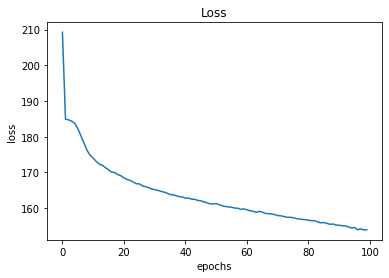

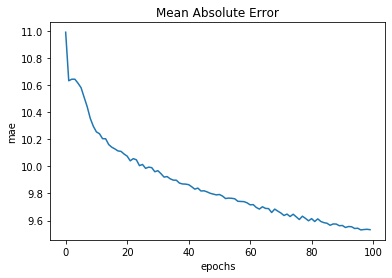

In [4]:
model = Sequential()

model.add(Dense(units=100, input_dim=X_train_validation.shape[1], activation=tf.nn.tanh))
model.add(Dense(units=60, activation=tf.nn.tanh))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train_validation, y_train_validation, epochs=100, batch_size=20)
epochs = history.epoch

loss = history.history['loss']
mea = history.history['mae']

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss)
plt.show()

plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.plot(epochs, mea)
plt.show()

In [5]:
test_mse, test_mae = model.evaluate(X_test, y_test)
print ("Test MSE: ", test_mse)
print ("Test MAE: ", test_mae)

y_predicted = model.predict(X_test)
print("Test R2 score:", sk_metrics.r2_score(y_test, y_predicted))


train_mse, train_mae = model.evaluate(X_train_validation, y_train_validation)
print ("Train MSE: ", train_mse)
print ("Train MAE: ", train_mae)

y_predicted_train = model.predict(X_train_validation)
print("Train R2 score:", sk_metrics.r2_score(y_train_validation, y_predicted_train))

181/181 [==============================] - 1s 5ms/step - loss: 161.2101 - mae: 9.5988
Test MSE:  161.21006774902344
Test MAE:  9.598836898803711
Test R2 score: 0.1159930914046926
367/367 [==============================] - 1s 4ms/step - loss: 153.2404 - mae: 9.3681
Train MSE:  153.2403564453125
Train MAE:  9.368120193481445
Train R2 score: 0.17121433106129902
